# Análise preliminar do conjunto de dados
Esse **Jupyter Notebook** tem como objetivo fazer uma análise preliminar do conjunto de dados. Nenhum Pré-Processamento, modelagem ou predição será feita agora. Apenas observações para trabalhos futuros.

# 01 -  Importando as bibliotecas necessárias
Agora vamos importar as bibliotecas necessárias para análise:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import py7zr

# 02 - Overview
Agora que nós já extraímos o dataset vamos dar uma olhada rápida nas 50 primeiras amostras do conjunto de dados e suas, respectivas, colunas:

In [2]:
with py7zr.SevenZipFile("../datasets/Train_rev1.7z", mode='r') as archive:
  archive.extractall(path="/tmp") # for linux users.

In [3]:
df = pd.read_csv("/tmp/Train_rev1.csv")

In [4]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


Vejam que nós temos um grande número de dados:
 - 244.768 amostras;
 - 12 colunas (atributos/campos/features).

# 03 - Tipos de dados
Na análise acima já deu para ver os tipos de dados de cada coluna, mas vamos ver outra abordagem que foca apenas nas colunas e seus, respectivos, tipos:

In [6]:
df.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

Olhando para as colunas acima da para ver que a maioria dos dados *não são* numéricos. Apenas:
 - **Id** - Que não é relevante (apenas para identificar cada amostra) quando se trata de aplicação estatística e criação de modelos.
 - **SalaryNormalized** - Que é a nossa variável *target*.

**NOTE:**  
Uma observação aqui é que a maioria dos dados mesmo sendo do tipo *object* são textos (informações) sobre as vagas de emprego. Futuramente nós vamos ter que fazer um Pré-Processamento desses textos (informações) para tirar insights dos mesmos.

# 04 - Dados missing
Vamos começar visualizando a quantidade de dados faltantes por coluna:

In [7]:
data_missing = df.isnull().sum()
data_missing

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

**NOTE:**  
Agora, vamos analisar quanto porcento (%) representam esses dados faltantes:

In [8]:
percentMissing = (data_missing / len(df.index)) * 100
percentMissing

Id                     0.000000
Title                  0.000409
FullDescription        0.000000
LocationRaw            0.000000
LocationNormalized     0.000000
ContractType          73.263662
ContractTime          26.108397
Company               13.249281
Category               0.000000
SalaryRaw              0.000000
SalaryNormalized       0.000000
SourceName             0.000409
dtype: float64

Vejam que apenas as colunas **ContractType**, **ContractTime** e **Company** estão com mais de 10% dos dados faltando (missing).

**NOTE:**  
Outra observação é a coluna **ContractType** que tem 73% dos dados faltando, o que chega a ser crítico.

> Isso, por que se você tem uma variável (atributo/feature) com mais de 60% dos dados faltando (missing) talvez essa variável na criação do modelo seja quase nula.

# 05 - Correlação
Como nós sabemos o [método Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (que é o mais utilizado para verificar correlações) utiliza variáveis numéricas para verificar o nível de correlação entre elas. Porém, a maioria das nossas variáveis são textos, apenas **Id** e **SalaryNormalized** são numéricas.

**NOTE:**  
Por hora, vou exibir essa correlação só para testes mesmo, mas como nós sabemos antes vamos ter que aplicar um Pré-Processamento nessas variáveis (textos) que representam informações sobre as vagas de emprego e só depois verificar a correlação entre elas.

In [9]:
print(df.corr(method = 'pearson'))

                        Id  SalaryNormalized
Id                1.000000          0.047091
SalaryNormalized  0.047091          1.000000


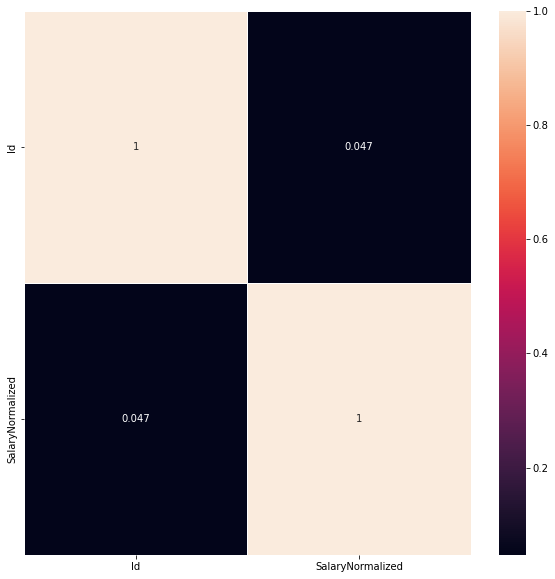

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5)
plt.show()

**NOTE:**  
Talvez uma alternativa aqui vai ser **categorizar** essas informações, mas vamos nos preocupar com isso na hora certa.

# 06 - Análise estatística

In [11]:
print(df.describe())

                 Id  SalaryNormalized
count  2.447680e+05     244768.000000
mean   6.970142e+07      34122.577576
std    3.129813e+06      17640.543124
min    1.261263e+07       5000.000000
25%    6.869550e+07      21500.000000
50%    6.993700e+07      30000.000000
75%    7.162606e+07      42500.000000
max    7.270524e+07     200000.000000


**NOTE:**  
Aqui vai ser o fim da nossa **Análise preliminar do conjunto de dados**. Na minha opinião os dados ainda não estão preparados para ser feito uma boa **Análise estatística**.

Sabendo disso, vamos passar para a próxima étapa que vai ser O **Pré-Processamento dos dados** e em seguida continuamos lá mesmo a **Análise estatística**.

# Resumo
Aqui vai um ***resumo*** das principais observações da nossa **Análise preliminar do conjunto de dados**:

 - Temos um grande conjunto de dados para trabalharmos:
   - Com 244.768 amostras e 12 colunas (atributos/campos/features).
 - Porém, vai ser necessário um Pré-Processamento na maior parte das colunas, devido o fato das colunas serem representadas por textos (informações).
 - Algumas colunas estão com muitos dados faltantes, principalmente a **ContractType** que tem **73%** dos dados faltantes.